In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tensorboard
from tensorboardX import SummaryWriter
from PIL import Image
  


In [16]:
#pip uninstall tensorboard-plugin-wit --yes


In [17]:
 #Data preperation

In [18]:
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize(
                                  mean=[0.5,0.5,0.5],
                                  std=[0.5,0.5,0.5]
                              )])

In [19]:
batch_size=4

trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [20]:
# get some random training imatplotlibs
dataiter = iter(trainloader)
images, labels = dataiter.next()


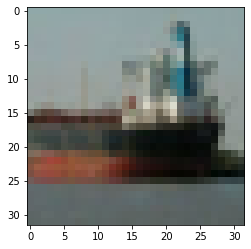

ship


In [21]:
def imshow(img):
    """"this function take a tensor image, unormalize it then converted it numpy format"""
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()



# show images
imshow(images[0])
# print labels

print(classes[labels[0].item()])
#print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [22]:
print(help(imshow))

Help on function imshow in module __main__:

imshow(img)
    "this function take a tensor image, unormalize it then converted it numpy format

None


In [23]:
#built a model 

In [24]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.leaky_relu(self.conv1(x)))
        x = self.pool(F.leaky_relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [25]:
#traine the model

In [98]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)
for epoch in range(40):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.304
[1,  4000] loss: 2.301
[1,  6000] loss: 2.299
[1,  8000] loss: 2.296
[1, 10000] loss: 2.288
[1, 12000] loss: 2.263
[2,  2000] loss: 2.170
[2,  4000] loss: 2.108
[2,  6000] loss: 2.048
[2,  8000] loss: 1.976
[2, 10000] loss: 1.924
[2, 12000] loss: 1.876
[3,  2000] loss: 1.819
[3,  4000] loss: 1.783
[3,  6000] loss: 1.731
[3,  8000] loss: 1.715
[3, 10000] loss: 1.662
[3, 12000] loss: 1.638
[4,  2000] loss: 1.610
[4,  4000] loss: 1.592
[4,  6000] loss: 1.579
[4,  8000] loss: 1.545
[4, 10000] loss: 1.549
[4, 12000] loss: 1.540
[5,  2000] loss: 1.515
[5,  4000] loss: 1.500
[5,  6000] loss: 1.501
[5,  8000] loss: 1.482
[5, 10000] loss: 1.484
[5, 12000] loss: 1.468
[6,  2000] loss: 1.437
[6,  4000] loss: 1.445
[6,  6000] loss: 1.434
[6,  8000] loss: 1.429
[6, 10000] loss: 1.409
[6, 12000] loss: 1.409
[7,  2000] loss: 1.386
[7,  4000] loss: 1.376
[7,  6000] loss: 1.354
[7,  8000] loss: 1.374
[7, 10000] loss: 1.352
[7, 12000] loss: 1.357
[8,  2000] loss: 1.313
[8,  4000] 

In [99]:
#PATH = './cifar_net_SGD.pth'
#torch.save(net.state_dict(), PATH)

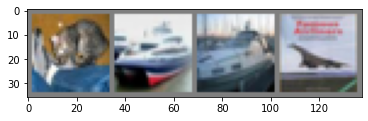

GroundTruth:    cat  ship  ship plane
Predicted:    cat plane  ship plane


In [100]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images)



_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [101]:
#test the model 
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 64 %


In [102]:
#adam optimizer
#train

In [103]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)
for epoch in range(40):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.578
[1,  4000] loss: 0.565
[1,  6000] loss: 0.587
[1,  8000] loss: 0.594
[1, 10000] loss: 0.610
[1, 12000] loss: 0.595
[2,  2000] loss: 0.537
[2,  4000] loss: 0.565
[2,  6000] loss: 0.569
[2,  8000] loss: 0.570
[2, 10000] loss: 0.572
[2, 12000] loss: 0.600
[3,  2000] loss: 0.525
[3,  4000] loss: 0.539
[3,  6000] loss: 0.539
[3,  8000] loss: 0.561
[3, 10000] loss: 0.567
[3, 12000] loss: 0.583
[4,  2000] loss: 0.514
[4,  4000] loss: 0.514
[4,  6000] loss: 0.521
[4,  8000] loss: 0.538
[4, 10000] loss: 0.559
[4, 12000] loss: 0.564
[5,  2000] loss: 0.492
[5,  4000] loss: 0.524
[5,  6000] loss: 0.514
[5,  8000] loss: 0.513
[5, 10000] loss: 0.540
[5, 12000] loss: 0.538
[6,  2000] loss: 0.493
[6,  4000] loss: 0.484
[6,  6000] loss: 0.514
[6,  8000] loss: 0.484
[6, 10000] loss: 0.503
[6, 12000] loss: 0.539
[7,  2000] loss: 0.447
[7,  4000] loss: 0.475
[7,  6000] loss: 0.474
[7,  8000] loss: 0.504
[7, 10000] loss: 0.510
[7, 12000] loss: 0.509
[8,  2000] loss: 0.432
[8,  4000] 

In [104]:
##PATH = './cifar_net_adam.pth'
##torch.save(net.state_dict(), PATH)

In [105]:
#test the model 
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


## VISUALIZING MODELS, DATA, AND TRAINING WITH TENSORBOARD
##### TensorBoard is  a tool designed for visualizing the results of neural network training runs

In [26]:
#Writing to TensorBoard
# image to our TensorBoard - specifically, a grid - using make_grid.
## create grid of images

#Setting up TensorBoard
#To write information into TensorBoard, we need to set it up by an object of SummaryWriter.

writer = SummaryWriter('runs/cifar10')



grid = torchvision.utils.make_grid(images)

# write to tensorboard

# create grid of images

writer.add_image('cifar10', grid, 0)


# Inspect the model using TensorBoard

writer.add_graph(net, images)
writer.close()
#!tensorboard --logdir=runs

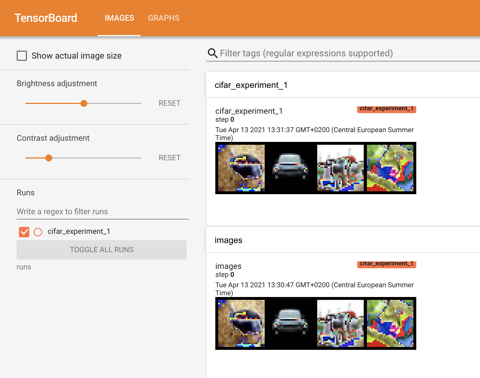

In [27]:
im = Image.open(r"images/tb1.png") 
im.thumbnail((480,480))
 # This method will show image in any image viewer 
im

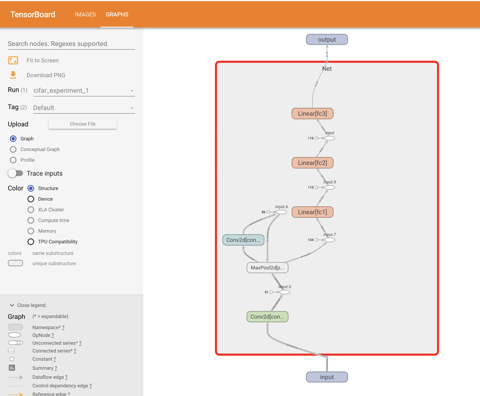

In [14]:
im = Image.open(r"images/tb2.png") 
im.thumbnail((480,480))
 # This method will show image in any image viewer 
im

In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    running_correct=0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        _, preds = torch.max(outputs.data, 1)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        running_correct += (preds == labels).sum().item()
        if i % 2000 == 1999:    # print every 2000 mini-batches

            
             # log the epoch loss
                
                
            writer.add_scalar('training loss',
                    running_loss/len(trainset))
                # log the epoch accuracy
            writer.add_scalar('training accuracy',
                    running_correct/len(trainset))            

        running_loss = 0.0
        running_correct=0.0

print('Finished Training')

Finished Training


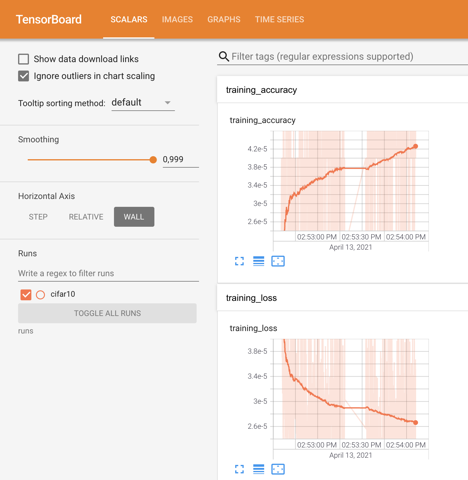

In [34]:
im = Image.open(r"images/tb3.png") 
im.thumbnail((480,480))
 # This method will show image in any image viewer 
im

In [33]:
!tensorboard --logdir=runs

TensorFlow installation not found - running with reduced feature set.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.4.0 at http://localhost:6007/ (Press CTRL+C to quit)
^C
